In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyMMF

## Define the fiber parameters

In [12]:
'''fiber settings'''
a = 5.# radius in um
areaSizeFactor = 2.8 # size of the window, in unit of radius
NA = 0.22 # numerical aperture
n1 = 1.45
npoints = 2**6 # resolution of the window (in each direction)
wl = 0.6328 # wavelength (in um)
poisson = 0.17 # Poisson coefficient of the fiber core material
N_curvature = 10
curvature_min = 1e3
curvature_max = 1e4
# curvature_vec = 1./np.linspace(1./curvature_max,1./curvature_min,N_curvature)
curvature_vec = np.linspace(curvature_max,curvature_min,N_curvature)

## Get the mode matrix of the straight fiber

In [13]:
# Create the fiber
areaSize = areaSizeFactor*a

# Create the fiber object
profile = pyMMF.IndexProfile(npoints = npoints, areaSize = areaSize)

# Initialize the index profile
profile.initStepIndex(n1=n1,a=a,NA=NA)

# Instantiate the solver
solver = pyMMF.propagationModeSolver()

# Set the profile to the solver
solver.setIndexProfile(profile)

# Set the wavelength
solver.setWL(wl)

# Set the Poisson coefficient
solver.setPoisson(poisson)

# Estimate the number of modes for a graded index fiber
Nmodes_estim = pyMMF.estimateNumModesSI(wl,a,NA,pola=1)

# We find a bit more modes to be safe
Nmodes_max = Nmodes_estim+10

# Find the modes of the straight fiber
modes = solver.solve(
    nmodesMax=Nmodes_max,
    boundary = 'close',
    mode = 'SI'
)
M0_straight = modes.getModeMatrix()

2020-07-15 14:49:11,298 - pyMMF.core [DEBUG  ]  Debug mode ON.
2020-07-15 14:49:11,300 - pyMMF.SI   [INFO   ]  Finding the propagation constant of step index fiber by numerically solving the dispersion relation.
2020-07-15 14:49:12,536 - pyMMF.SI   [INFO   ]  Found 30 modes is 1.24 seconds.
2020-07-15 14:49:12,713 - pyMMF.core [DEBUG  ]  Mode data stored in memory.


## Get the modes with bending

In [14]:
def get_modes_curv(c):
    _,M0_bent = modes.getCurvedModes(curvature=[c,1e8])
    return M0_bent
M0_bent_vec = [get_modes_curv(c) for c in curvature_vec]  

## Generate and save the images

/opt/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


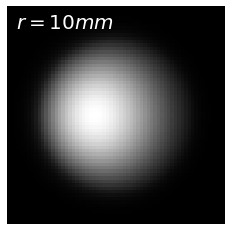

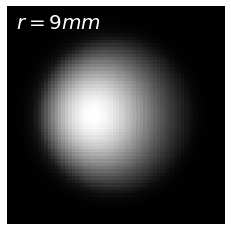

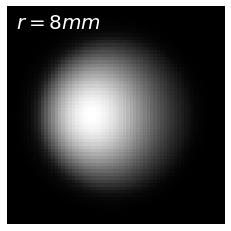

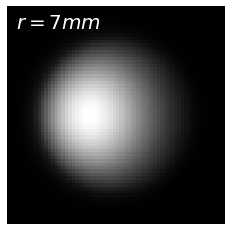

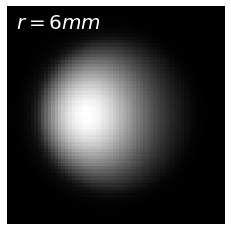

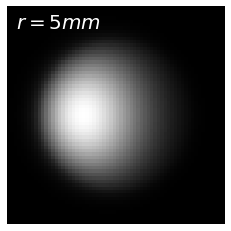

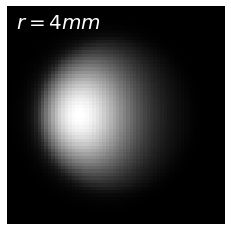

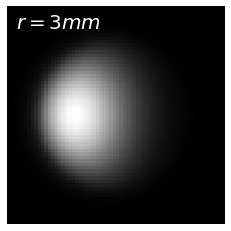

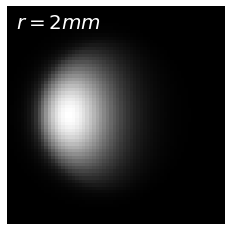

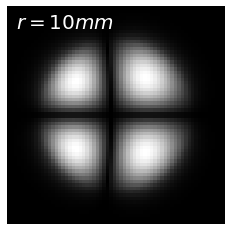

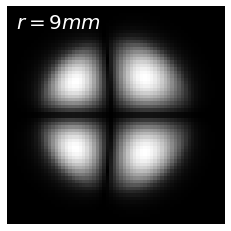

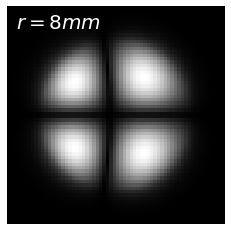

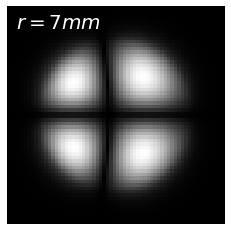

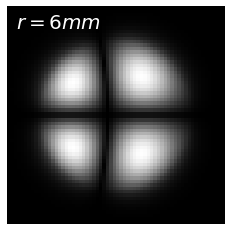

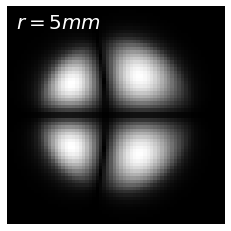

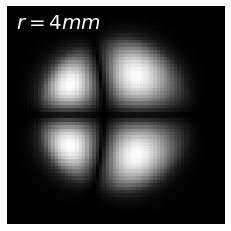

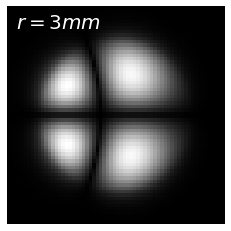

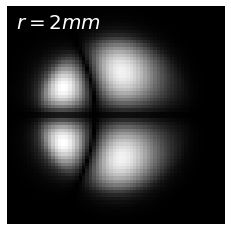

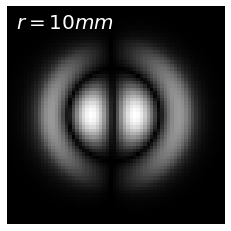

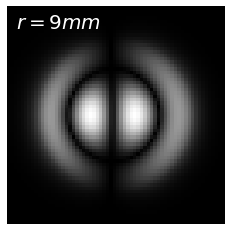

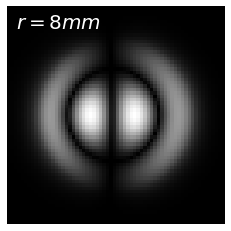

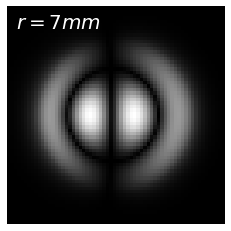

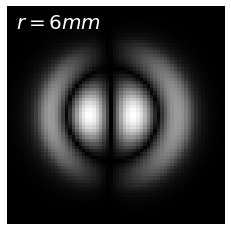

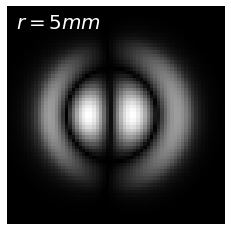

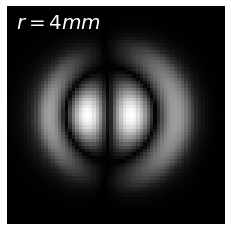

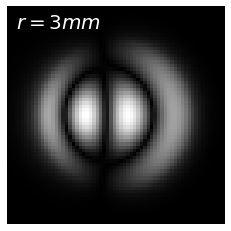

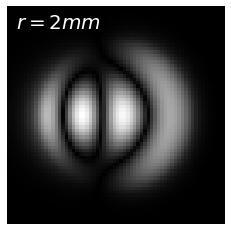

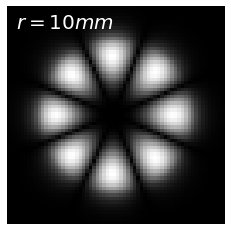

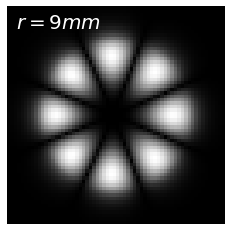

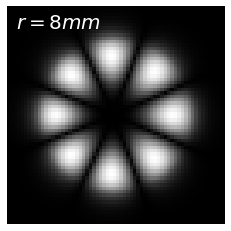

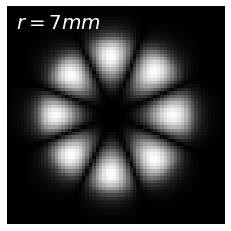

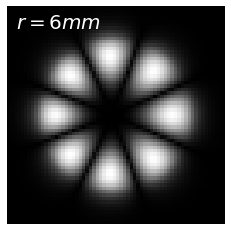

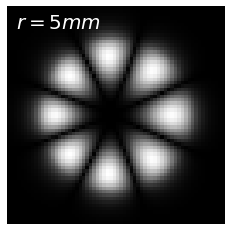

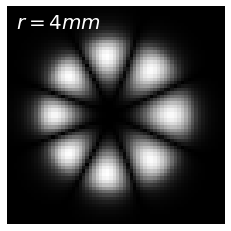

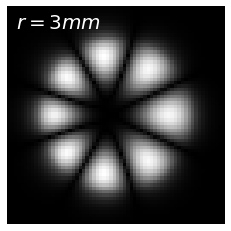

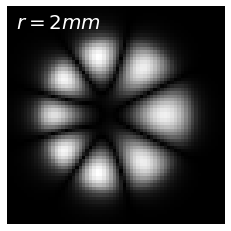

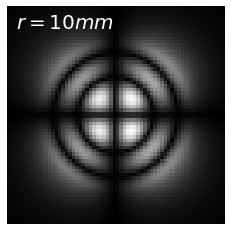

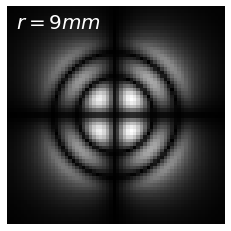

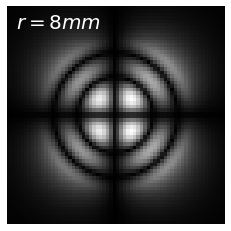

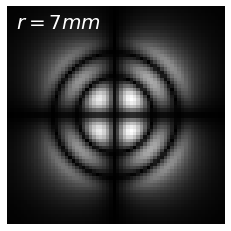

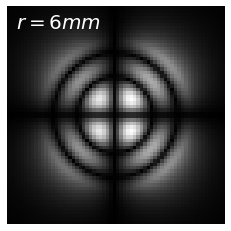

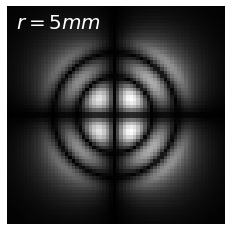

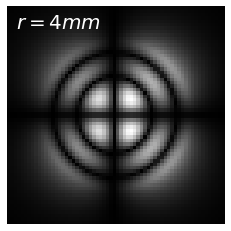

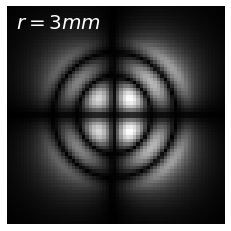

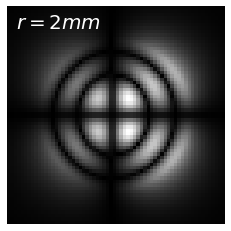

In [18]:
modes_to_record = [0,4,9,11,28]

for m in modes_to_record:
    for c,M in  zip(curvature_vec,M0_bent_vec[:-1]):
        plt.figure()
        plt.imshow(
            np.abs(M[:,m].reshape([npoints]*2)),
            aspect='equal',
            interpolation = 'None',
            cmap=plt.cm.gray)
        plt.text(2, 6, rf'$r={c/1e3:.0f} mm$', fontsize=20, color = 'white') 
        plt.axis('off')
        plt.savefig(f"mode_{m}_{c}.png")
